<a href="https://colab.research.google.com/github/MANAGEMENt275/MachineLearningRevise/blob/main/KNN_k1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
# !pip install fireducks

import fireducks.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter


In [134]:
def euclidean_distance(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)
class knn:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_commom= Counter(k_nearest_labels).most_common()
        return most_commom[0][0]

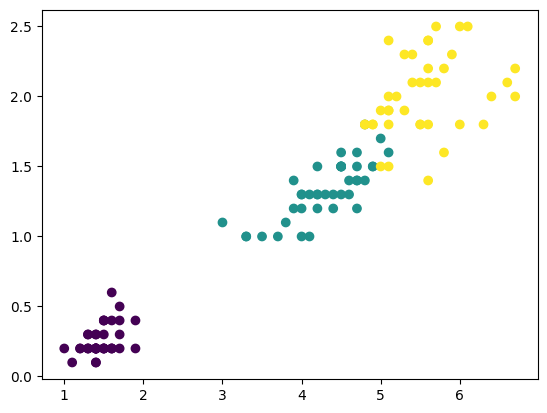

In [135]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='viridis')
plt.show()

In [136]:
ckf = knn(k=3)
ckf.fit(X_train, y_train)
predictions = ckf.predict(X_test)
print(predictions)

[2, 2, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0]


In [140]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc*100)

96.66666666666667


In [137]:
X_train.shape

(120, 4)